<a href="https://colab.research.google.com/github/Bhavin52/Case_Study/blob/main/Multi_Linear_Regression_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# A large toyota car delarship rolled out used cars exchange offer for a new car.To ensure a responsible profit,the diller need to be able to predict  the price that delarship will get for used cars.
  # for this reason, data were collected on all previous sales of used Toyota cars at delearship.we have a database with 1000 cars

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [14]:
#Read the data
cars = pd.read_csv("/content/Toyoto_Corrola.csv")
cars.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [16]:
cars.describe()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,721.555014,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,416.476890,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,1.000000,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,361.750000,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,721.500000,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,1081.250000,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,1442.000000,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


In [17]:
#check for missing values
cars.isna().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [18]:
cars.drop('Cylinders', axis=1, inplace=True)
cars.drop('Id', axis=1, inplace=True)

In [19]:
cars.head()

,Model,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,5,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,5,1165
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,5,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,5,1170


In [20]:
cars = pd.DataFrame(cars)
cars.rename(columns = {'Age_08_04':'Age'}, inplace = True)
print("\nAfter modifying first column:\n", cars.columns)



After modifying first column:
 Index(['Model', 'Price', 'Age', 'KM', 'HP', 'Doors', 'Gears', 'Weight'], dtype='object')


# Correlation Matrix

In [21]:
cars.corr()

,Price,Age,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,0.020613,1.000000


# Scatterplot between variables along with histograms

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Preparing a model

In [23]:
#Build model
import statsmodels.formula.api as smf 
model_0 = smf.ols('Price~Age+KM+HP+Weight+Doors+Gears',data=cars).fit()#without any transformations
model_1 = smf.ols('Price~np.log(Age+KM+HP+Weight+Doors+Gears)',data=cars).fit() #log transformation
model_2 = smf.ols('np.log(Price)~Age+KM+HP+Weight+Doors+Gears',data=cars).fit() #exponential transformation
model_3 = smf.ols('Price~np.sqrt(Age+KM+HP+Weight+Doors+Gears)',data=cars).fit() #SQRT transformation

In [ ]:
#Coefficients
print("\nSimple model parameters:\n", model_0.params)
print("\nlog Transformation:\n", model_1.params)
print("\nExponential transformation:\n", model_2.params)
print("\nSQRT transformation:\n", model_3.params)

In [ ]:
print(model_0.tvalues, "\nSimple model parameters:\n", model_0.pvalues)#Administration and Marketing Is Influance our model
print(model_1.tvalues, "\nlog Transformation:\n", model_1.pvalues)
print(model_2.tvalues, "\nExponential transformation:\n", model_2.pvalues)
print(model_3.tvalues, "\nSQRT transformation:\n", model_3.pvalues)

In [26]:
print("\nSimple model:\n",model_0.rsquared,model_0.rsquared_adj)
print("\nlog Transformation:\n",model_1.rsquared,model_1.rsquared_adj)
print("\nExponential transformation:\n",model_2.rsquared,model_2.rsquared_adj)
print("\nSQRT transformation:\n",model_3.rsquared,model_3.rsquared_adj)


Simple model:
 0.8628024511073656 0.8622263942190831

log Transformation:
 0.431691406456016 0.43129509641867714

Exponential transformation:
 0.8483321588173621 0.8476953449285617

SQRT transformation:
 0.4022805717965956 0.40186375211165604


In [ ]:
# as we can analys from above cell in Simple model has high coefficiant of determination(R^2) so we continue without any transformation

# Model Validation 
# 1)Collinearity check 2)Residual Analysis

In [27]:
# 1) Collinearity Problem Check
# formula VIF = 1/(1-Rsquare) for all independent variables

rsq_age = smf.ols('Age~KM+HP+Weight+Doors+Gears',data=cars).fit().rsquared  
vif_age = 1/(1-rsq_age) 

rsq_km = smf.ols('KM~HP+Weight+Age+Doors+Gears',data=cars).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_hp = smf.ols('HP~Weight+Age+KM+Doors+Gears',data=cars).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_weight = smf.ols('Weight~Age+KM+HP+Doors+Gears',data=cars).fit().rsquared  
vif_weight = 1/(1-rsq_weight)

rsq_doors = smf.ols('Doors~Age+KM+HP+Weight+Gears',data=cars).fit().rsquared  
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~Age+KM+HP+Doors+Weight',data=cars).fit().rsquared  
vif_gears = 1/(1-rsq_gears)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','Weight','Doors','Gears'],'VIF':[vif_age,vif_km,vif_hp,vif_weight,vif_doors,vif_gears]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

#no Independent variable has VIF>20 ,SO no collinarity consider all independent variables

,Variables,VIF
0,Age,1.874542
1,KM,1.627039
2,HP,1.214909
3,Weight,1.508041
4,Doors,1.149301
5,Gears,1.096501


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

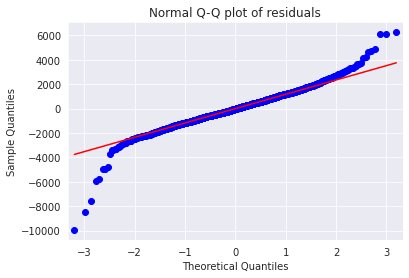

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_0.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [29]:
list(np.where(model_0.resid>5000)) #find model outliers 

[array([109, 147, 523])]

In [30]:
list(np.where(model_0.resid<-5000))

[array([191, 192, 221, 601, 960])]

## Residual Plot for Homoscedasticity

In [31]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

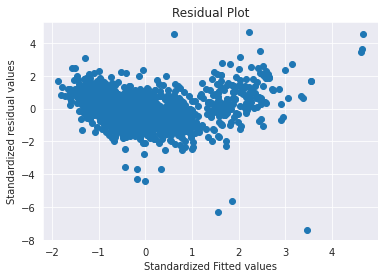

In [32]:
plt.scatter(get_standardized_values(model_0.fittedvalues),
            get_standardized_values(model_0.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

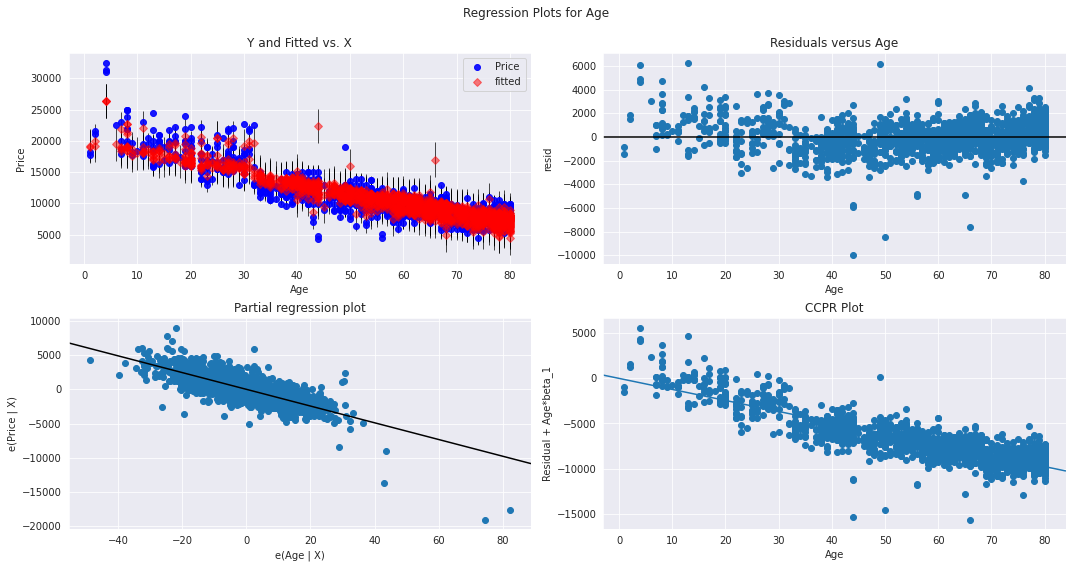

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_0, "Age", fig=fig)
plt.show()

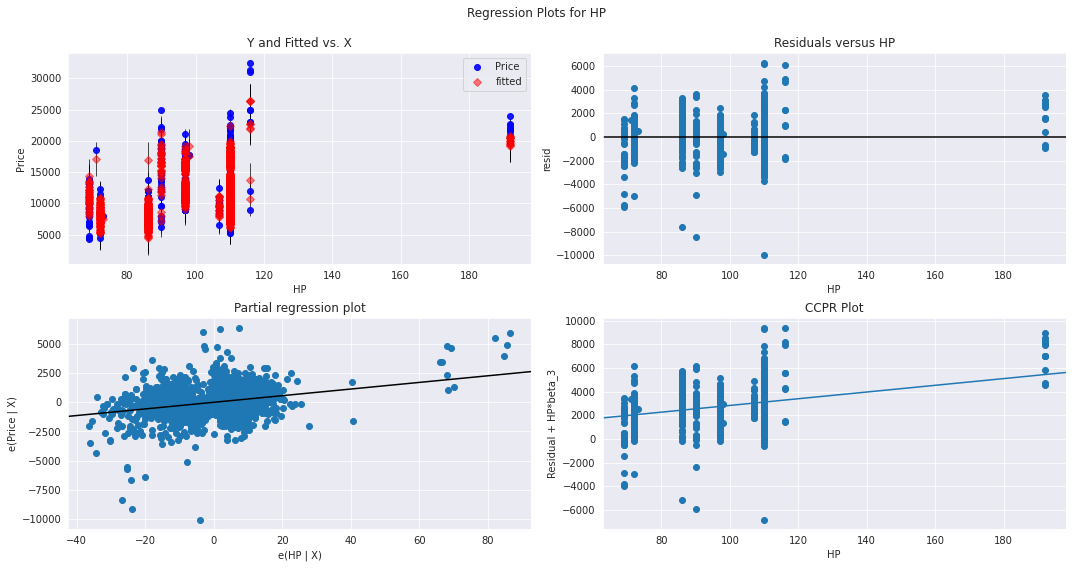

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_0, "HP", fig=fig)
plt.show()

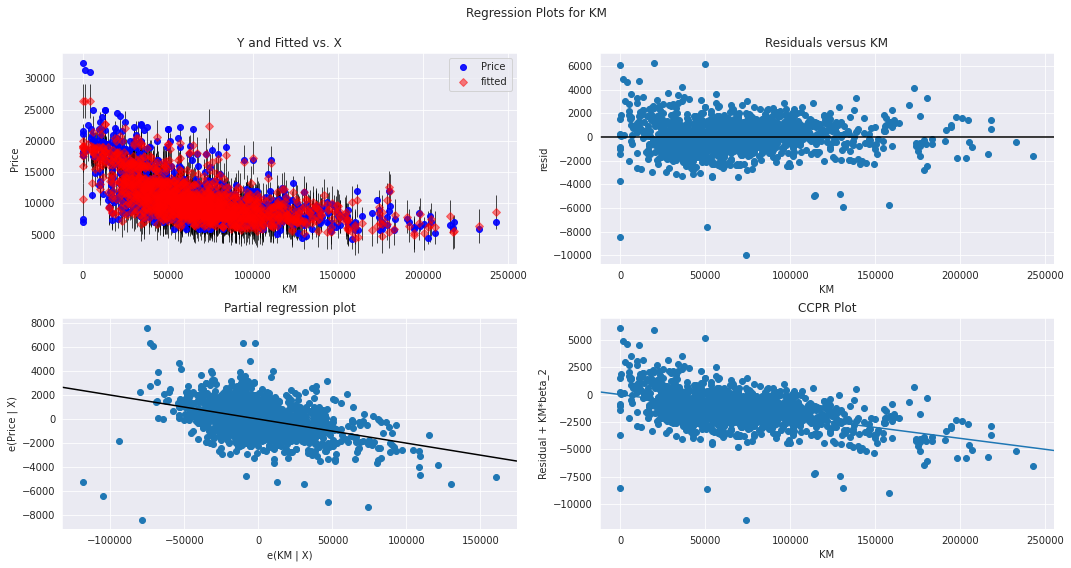

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_0, "KM", fig=fig)
plt.show()

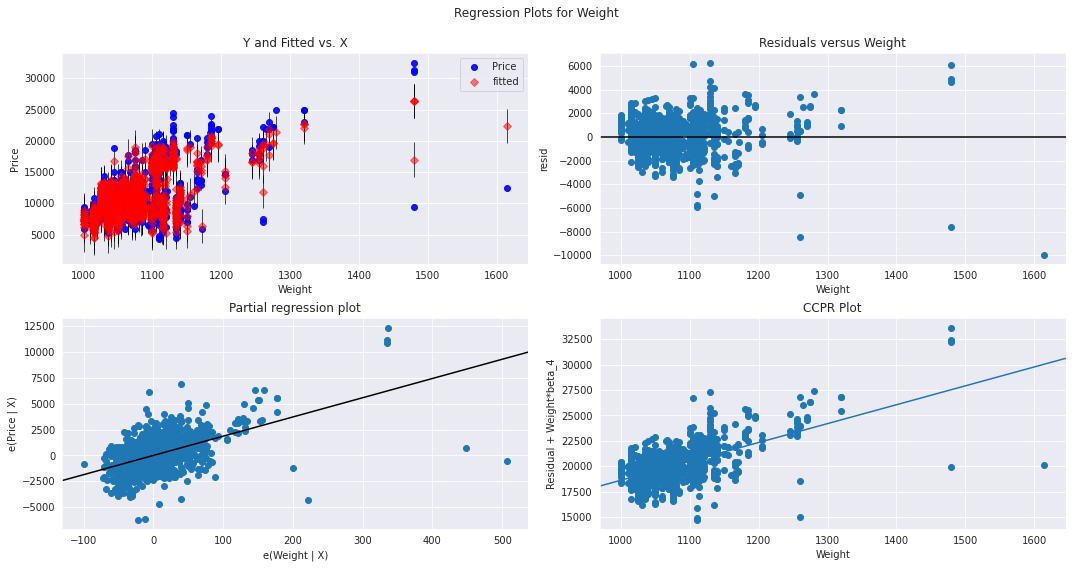

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_0, "Weight", fig=fig)
plt.show()

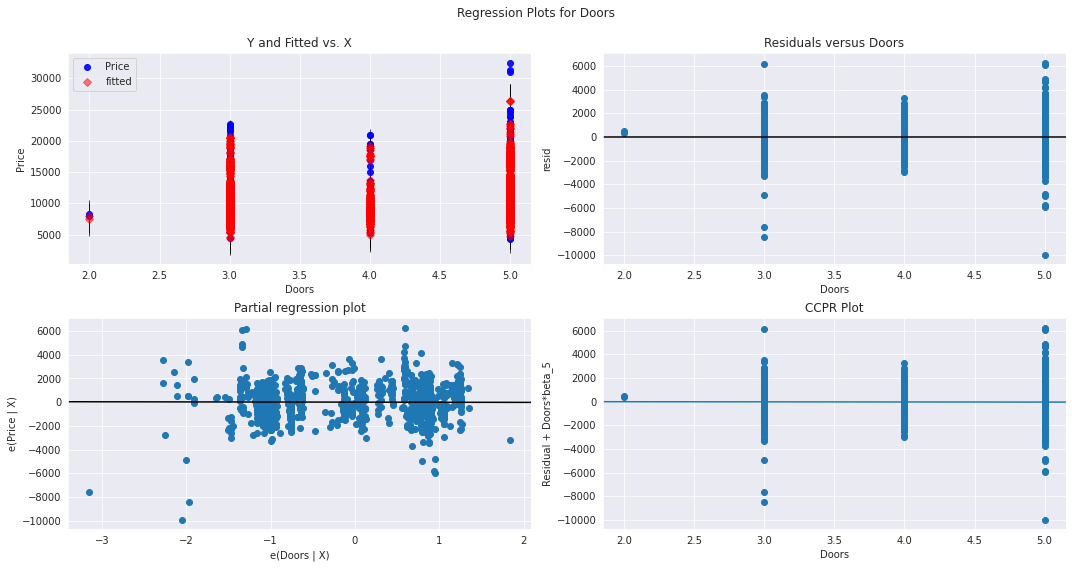

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_0, "Doors", fig=fig)
plt.show()

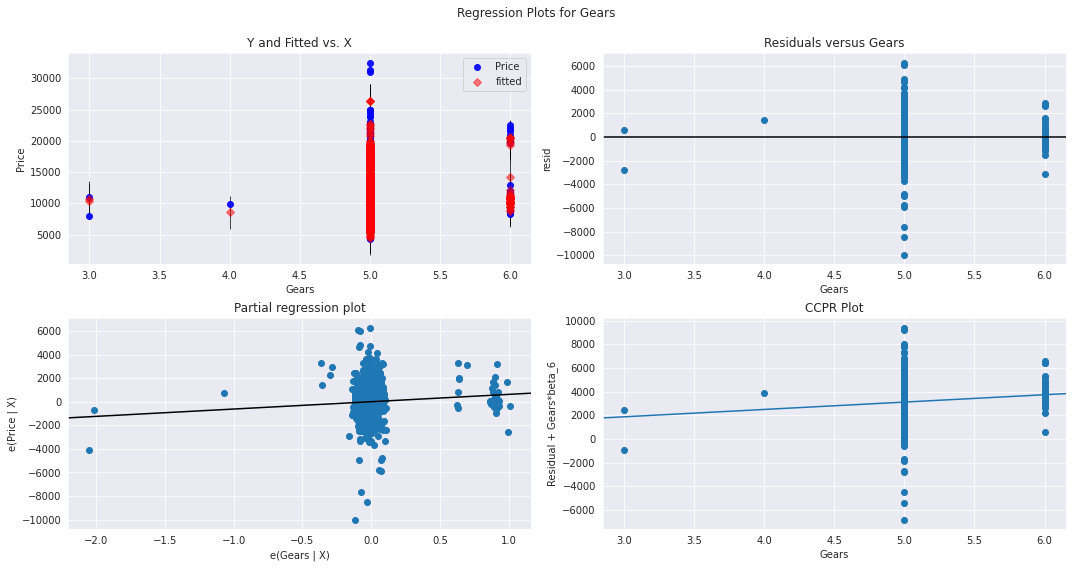

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_0, "Gears", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [40]:
model_influence = model_0.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


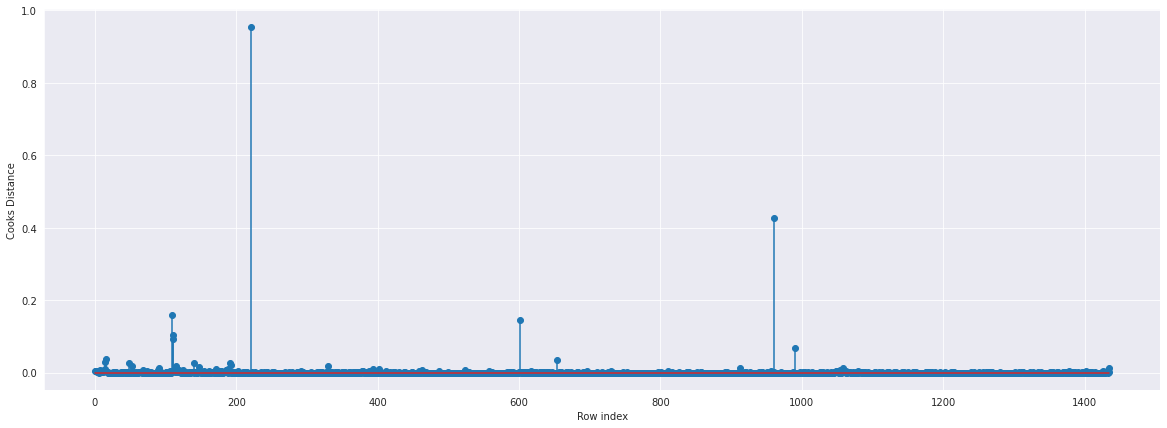

In [41]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 0.95531514386947)

## High Influence points

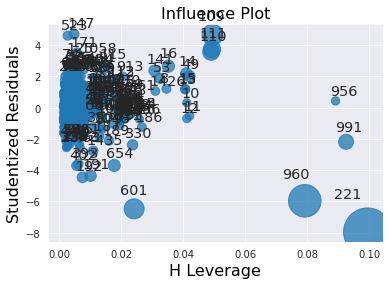

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_0)
plt.show()

In [44]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff


0.018802228412256268

#### it is evident that data point 191, 192, 221, 601, 960,109, 147, 523 are the influencers

In [45]:
cars[cars.index.isin([191, 192, 221, 601, 960,109, 147, 523])]

,Model,Price,Age,KM,HP,Doors,Gears,Weight
109,ÊTOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS MPV,32500,4,1,116,5,5,1480
147,TOYOTA Corolla 1.6 16V VVT I 5DR EXEC BNS 4/5-...,24500,13,19988,110,5,5,1130
191,TOYOTA Corolla 1.8D Stationwagen,4350,44,158320,69,5,5,1110
192,TOYOTA Corolla 1.8D 4/5-Doors,4750,44,131273,69,5,5,1110
221,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,5,1615
523,ÊTOYOTA Corolla 1.6 HB LINEA TERRA 2/3-Doors,18950,49,49568,110,3,5,1105
601,TOYOTA Corolla 2.0 d HB Diesel 2/3-Doors,7500,50,1,90,3,5,1260
960,TOYOTA Corolla,9390,66,50806,86,3,5,1480


# Improving the model

In [46]:
#Discard the data points which are influencers and reasign the row number (reset_index())
cars=cars.drop(cars.index[[109, 147, 523,191, 192, 221, 601, 960]],axis=0).reset_index()

In [47]:
#Drop the original index
cars=cars.drop(['index'],axis=1)
cars

,Model,Price,Age,KM,HP,Doors,Gears,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,5,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,5,1165
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,5,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...,...
1423,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,5,1025
1424,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,5,1015
1425,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,5,1015
1426,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,5,1015


In [49]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Model   1428 non-null   object
 1   Price   1428 non-null   int64 
 2   Age     1428 non-null   int64 
 3   KM      1428 non-null   int64 
 4   HP      1428 non-null   int64 
 5   Doors   1428 non-null   int64 
 6   Gears   1428 non-null   int64 
 7   Weight  1428 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 89.4+ KB


# Build Model

In [50]:
model_final = smf.ols('Price~Age+KM+HP+Weight+Doors+Gears',data=cars).fit()

In [51]:
(model_final.rsquared,model_final.rsquared_adj)

(0.8811642353988288, 0.8806624658086761)

In [53]:
compare={'Prep_Models':['Model','Final_Model'],'Rsquared':[model_0.rsquared,model_final.rsquared]}
table=pd.DataFrame(compare)
table

,Prep_Models,Rsquared
0,Model,0.862802
1,Final_Model,0.881164
